In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/disaster-tweets/tweets.csv


In [41]:
tweets = pd.read_csv('/kaggle/input/disaster-tweets/tweets.csv')

In [5]:
tweets

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


### EDA

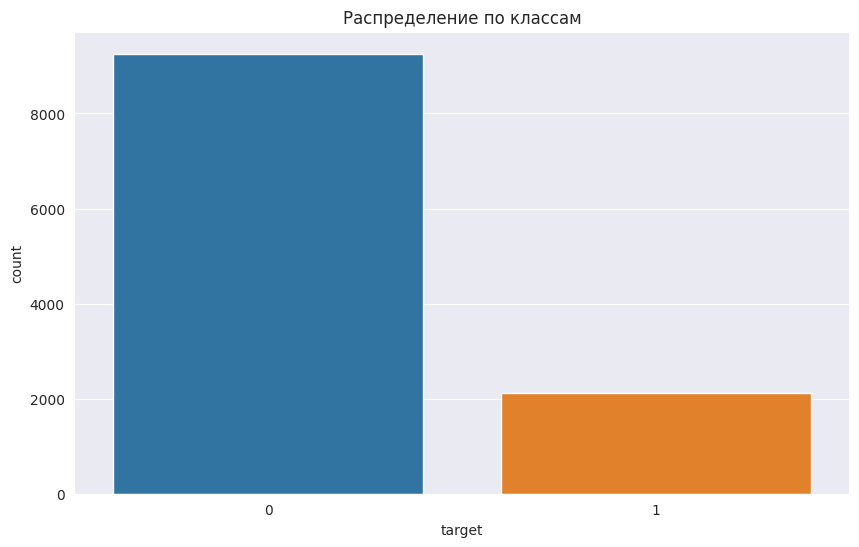

In [11]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(data=tweets, x='target')
plt.title('Распределение по классам')
plt.show()

Чаще встречаются твиты, не имеющие в себе информацию о какой-либо катастрофе. Disaster twits составляют около 20% от общего числа твитов в датасете. 

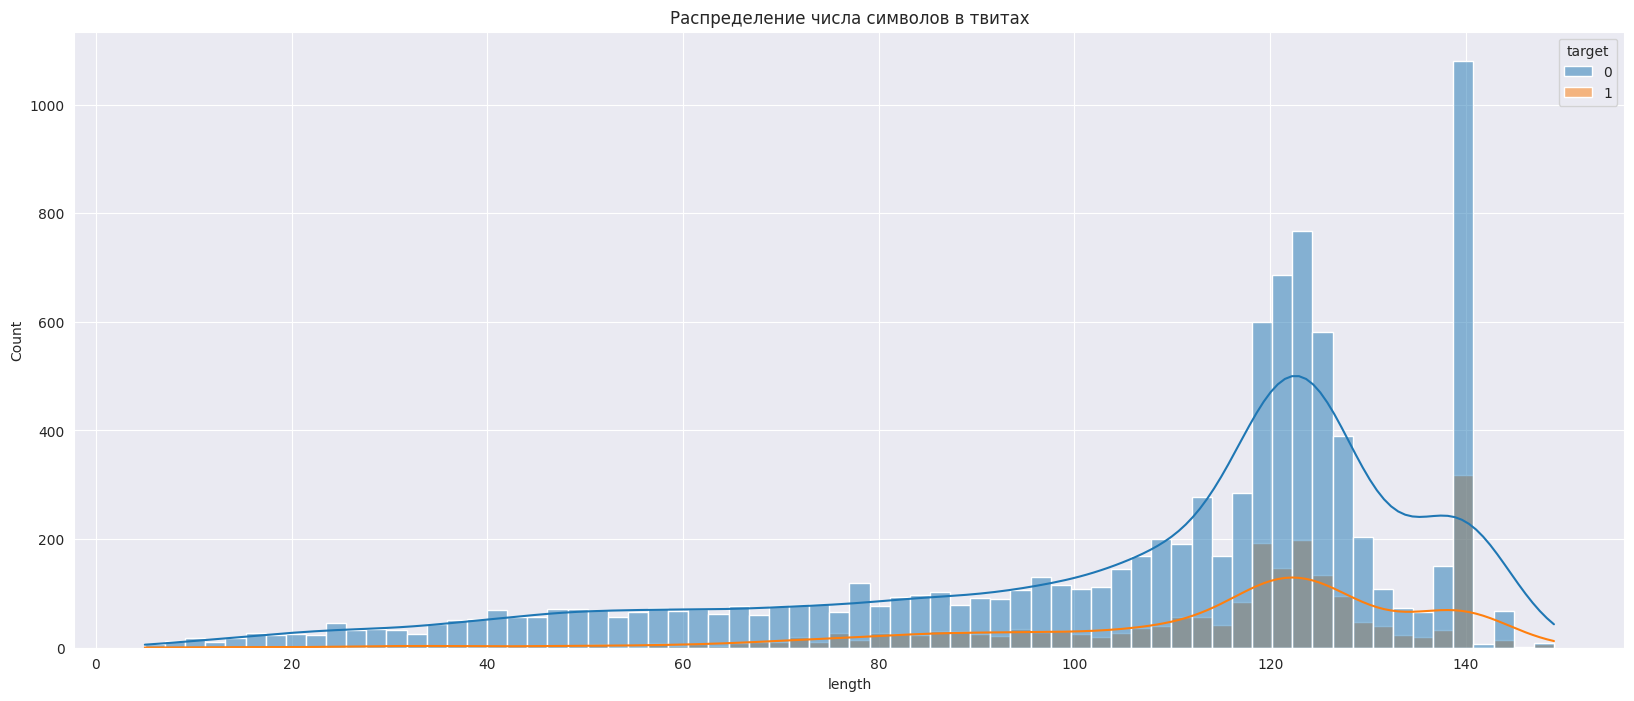

In [67]:
tweets['length'] = tweets.text.apply(len)

plt.figure(figsize=(20,8))
sns.histplot(data=tweets,x='length',hue='target',kde= True,bins=70)
plt.title('Распределение числа символов в твитах')
plt.show()

Распределение числа символом среди твитов-катастроф и обычных твитов схоже: распределение нормально в диапазоне 116 - 126 слов и имеет скачок при 140 словах.

In [27]:
def count_word_len(string):
    res = []
    
    for s in string:
        res.append(len(s))
        
    return res

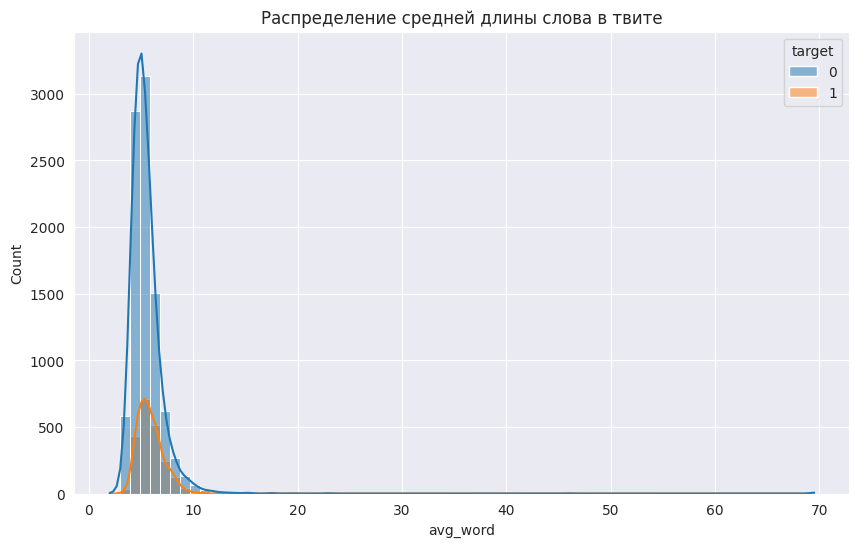

In [47]:
tweets['avg_word'] = tweets['text'].str.split().apply(count_word_len).map(lambda x: np.mean(x))

plt.figure(figsize=(10,6))
sns.histplot(tweets, x='avg_word', hue='target',kde= True,bins=70)
plt.title('Распределение средней длины слова в твите')
plt.show()

Распределение здесь так же одинаково, в основном длина слов находится в диапазоне от 3-10 символов в слове. Можно предположить, что длина слов в твитах не зависит от того, связана ли информация в нем с катастрофой или нет. Возможно, это связано с концепцией твиттера - делать небольшие заметки о происходящем.

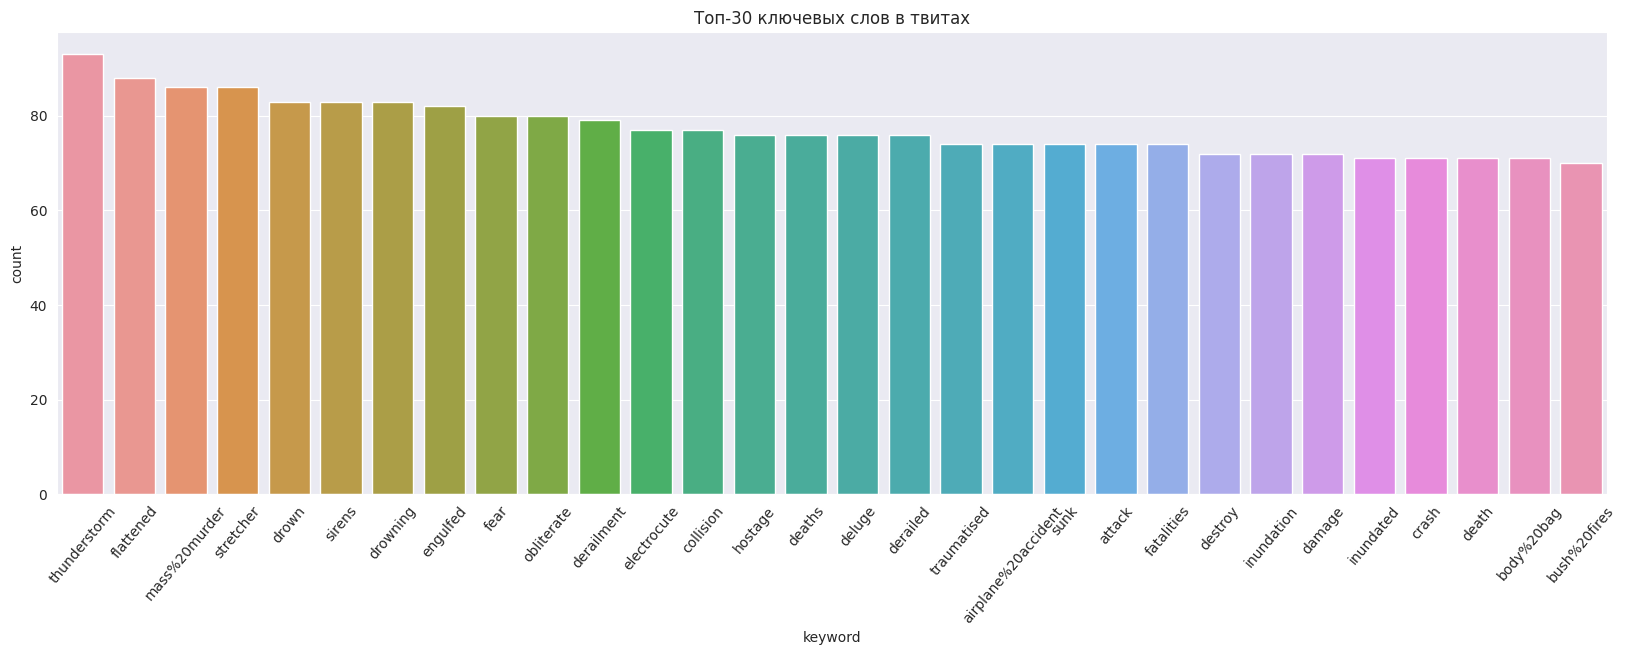

In [64]:
key_data = tweets.groupby('keyword')['target'].count().sort_values(ascending=False)
key_words = pd.DataFrame({'keyword': key_data.index, 'count': key_data.values})

plt.figure(figsize=(20,6))
sns.barplot(data=key_words.head(30), x='keyword', y='count')
plt.xticks(rotation = 50)
plt.title('Топ-30 ключевых слов в твитах')
plt.show()

Хоть число твитов-катастроф в 4 раза меньше числа обычных твитов, в топе ключевых слов в основном находятся те, которые так или иначе связаны с катаклизмами или трагедиями. Это можно объяснить тем, что в обычной жизни люди в основном пишут на сильно разбросанные темы, и такие твиты сложно объединить в большие группы.

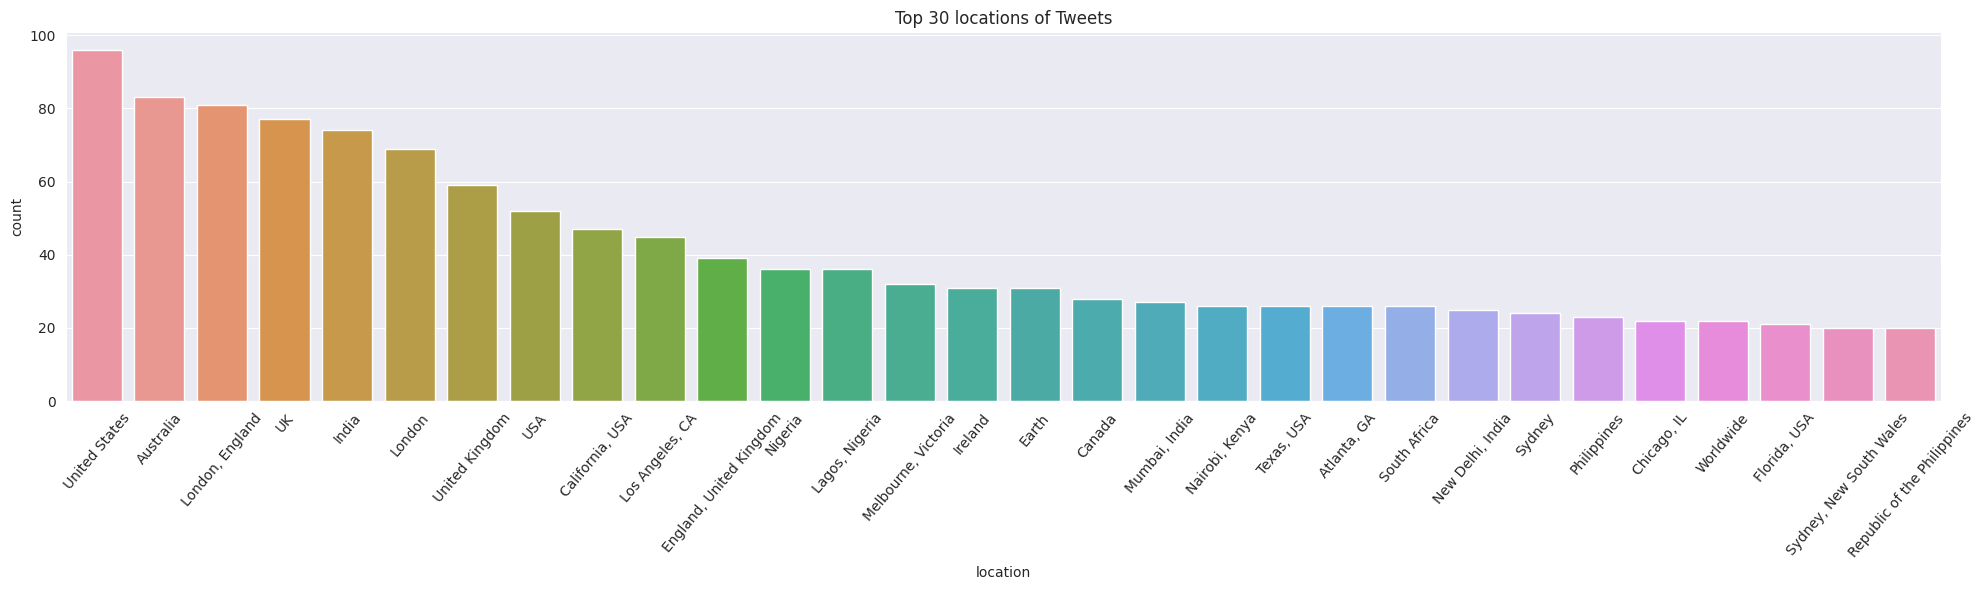

In [66]:
data_loc = tweets.groupby('location')['target'].count().sort_values(ascending=False)
locat = pd.DataFrame({'location': data_loc.index,'count': data_loc.values})

plt.figure(figsize=(20,6))
sns.barplot(data=locat.head(30),x='location',y='count')
plt.xticks(rotation = 50)
plt.title('Top 30 locations of Tweets')
plt.tight_layout()
plt.show()

#### Удаление стоп-слов

In [ ]:
from nltk.corpus import stopwords

